# **Homework II**
##### Grupo 41
##### Raquel Rodrigues (ist1106322) e Leonor Figueira (ist1106157)

## II. Pogramming

#### Pergunta 1)
#### a.

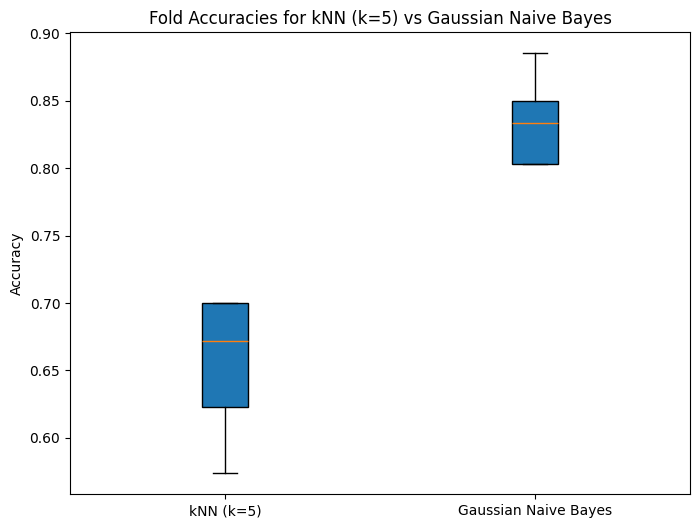

In [1]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('heart-disease.csv')

# Separating features from target
X = df.drop(columns='target')
y = df['target']

# Initialize stratified 5-fold cross-validation with shuffling
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize k-Nearest Neighbors classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Gaussian Naïve Bayes model
nb = GaussianNB()

# Cross-validation for each model
knn_scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
nb_scores = cross_val_score(nb, X, y, cv=folds, scoring='accuracy')

# Plotting boxplots with the fold accuracies
plt.figure(figsize=(8, 6))
plt.boxplot([knn_scores, nb_scores], labels=['kNN (k=5)', 'Gaussian Naive Bayes'], patch_artist=True)
plt.title('Fold Accuracies for kNN (k=5) vs Gaussian Naive Bayes')
plt.ylabel('Accuracy')
plt.show()

- Olhando para o gráfico resultante, podemos constatar facilmente que existe uma grande discrepância entre os dois boxplots dos modelos utilizados. O Gaussian Naïve Bayes apresenta, de forma generalizada, uma melhor exatidão que o modelo kNN, sendo que todos os seus valores se encontram acima dos 0.80. Por sua vez, os valores de acurácia do kNN estão abaixo dos 0.70. Além disso, observamos que o intervalo interquartil (IQR) deste modelo é superior ao do modelo Naïve Bayes, assim como verificamos que os "bigodes" se estendem mais, o que significa que os seus valores de performance, consoante os folds, variam bastante comparativamente ao modelo alternativo. Assim, concluímos que o modelo mais estável em termos de performance é o Gaussian Naïve Bayes.
- Efetivamente, quando aplicamos estes dois modelos sem considerar a normalização das variáveis dos dados para que se encontrem na mesma escala, devemos esperar uma maior instabilidade nos resultados do modelo kNN. Esta expectativa deve-se ao facto de o kNN ser extramente sensível às escalas e intervalos de valores dos atributos, uma vez que calcula as distâncias entre pontos. Se as variáveis dos dados apresentarem amplitudes de valores diversas, as distâncias calculadas podem ser distorcidas e resultar numa maior variação na performance mediante os folds. Em contrapartida, o Gaussian Naïve Bayes não depende de nenhuma métrica de distância e, por isso, não é tão afetado pela falta de "scaling".

#### b.

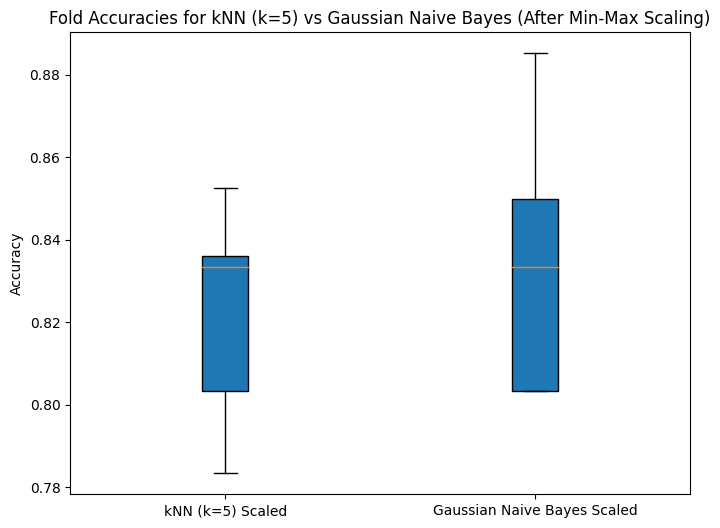

In [28]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
df = pd.read_csv('heart-disease.csv')

# Separating features from target
X = df.drop(columns='target')
y = df['target']

# Initialize stratified 5-fold cross-validation with shuffling
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize k-Nearest Neighbors classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Gaussian Naïve Bayes model
nb = GaussianNB()

# Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Cross-validation with scaled data for kNN and Naive Bayes
knn_scores_scaled = cross_val_score(knn, X_scaled, y, cv=folds, scoring='accuracy')
nb_scores_scaled = cross_val_score(nb, X_scaled, y, cv=folds, scoring='accuracy')

# Plotting the new boxplots after Min-Max Scaling
plt.figure(figsize=(8, 6))
plt.boxplot([knn_scores_scaled, nb_scores_scaled], labels=['kNN (k=5) Scaled', 'Gaussian Naive Bayes Scaled'], patch_artist=True)
plt.title('Fold Accuracies for kNN (k=5) vs Gaussian Naive Bayes (After Min-Max Scaling)')
plt.ylabel('Accuracy')
plt.show()

#### c.

De modo a verificar se o modelo de KNN é estatisticamente superior ao modelo de naïve Bayes, foi realizado um teste
de hipóteses:

- Hipótese H0: kNN accuracy = NB accuracy
- Hipótese H1: kNN accuracy > NB accuracy

In [36]:
from scipy import stats

res = stats.ttest_rel(knn_scores_scaled, nb_scores_scaled, alternative='greater')
print("p-value =", res.pvalue)

p-value = 0.2537311948784664


Com base neste valor de p-value, aproximadamente 0.933, não se pode rejeitar a hipótese nula para níveis de significância 1%, 5% e 10%.

Isto significa que não há uma grande diferença estatística entre a exatidão dos modelos, e não podemos afirmar que a afirmação "𝑘NN is statistically superior to Naïve Bayes regarding accuracy” é verdadeira. 

#### Pergunta 2)
#### a.

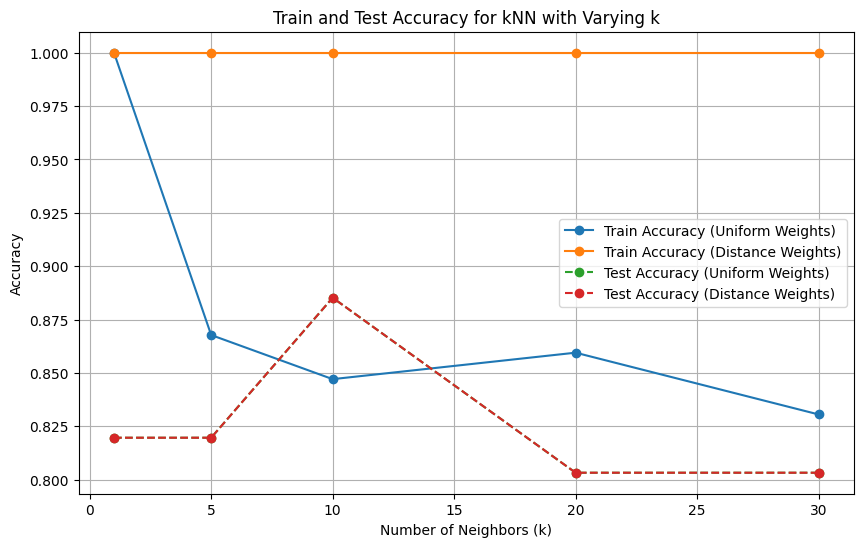

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('heart-disease.csv')

# Separating features from target
X = df.drop(columns='target')
y = df['target']

# 80-20 training-testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 5, 10, 20, 30]

train_accs_uniform = []
test_accs_uniform = []
train_accs_distance = []
test_accs_distance = []

for k in k_values:
    # Uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train_scaled, y_train)
    
    train_pred_uniform = knn_uniform.predict(X_train_scaled)
    test_pred_uniform = knn_uniform.predict(X_test_scaled)
    
    train_accs_uniform.append(accuracy_score(y_train, train_pred_uniform))
    test_accs_uniform.append(accuracy_score(y_test, test_pred_uniform))


    # Distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train_scaled, y_train)

    train_pred_distance = knn_distance.predict(X_train_scaled)
    test_pred_distance = knn_distance.predict(X_test_scaled)

    train_accs_distance.append(accuracy_score(y_train, train_pred_distance))
    test_accs_distance.append(accuracy_score(y_test, test_pred_distance))


# Plot the train an test accuracies for each model
plt.figure(figsize=(10, 6))

# Train accuracy
plt.plot(k_values, train_accs_uniform, label='Train Accuracy (Uniform Weights)', marker='o')
plt.plot(k_values, train_accs_distance, label='Train Accuracy (Distance Weights)', marker='o')

# Test accuracy
plt.plot(k_values, test_accs_uniform, label='Test Accuracy (Uniform Weights)', marker='o', linestyle='--')
plt.plot(k_values, test_accs_distance, label='Test Accuracy (Distance Weights)', marker='o', linestyle='--')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for kNN with Varying k')
plt.legend()
plt.grid(True)
plt.show()

#### b.
...

#### Pergunta 3)
...

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Considerando as propriedades dos dados do ficheiro "heart-disease.csv", estas podem gerar algumas dificuldades quando utilizado o modelo de Naïve Bayes. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Primeiramente, este modelo assume que todas as variáveis são condicionalmente independentes dada a classe. Porém, olhando para as variáveis presentes nos dados poderemos concluir com bastantes certezas que algumas destas são, muito provavelmente, relacionadas entre si. Variáveis como a "age" podem influenciar os valores das variáveis: "trestbps" (pressão arterial), "chol" (níveis de colestrol), "fbs" (níveis de açúcar no sangue), "restecg" (resultados do eletrocardiograma), "thalach" (máximo batimento cardíaco), "thal" (distúrbio sanguíneo) e "ca" (número de vasos coronários principais ). Os atributos "chol" e "trestbps" também podem estar correlacionados, assim como "chol" e "fbs", entre outros. Desta forma, o modelo poderá levar a estimativas pouco precisas com "bias", uma vez que não toma em conta as correlações entre variáveis.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Por outro lado, o modelo Naïve Bayes é adequado quando dispomos de um conjunto de dados de dimensão considerável (moderada ou grande). Neste caso, possuimos apenas 303 observações no total, o que poderá significar que as estimativas resultantes do modelo não serão as mais exatas. Assim, os dados fornecidos podem não ser suficientes para aplicar o Naïve Bayes com confiança.